In [2]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn import SelectKBest, mutual_info_regression, RFE

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [3]:
X, y = load_boston(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
selector = SelectKBest(mutual_info_regression, k=5)

In [6]:
selector.fit(X_train, y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x0000028DD45118B8>)

In [7]:
X_selected = selector.transform(X_train)

In [8]:
X_train.shape

(379, 13)

In [9]:
X_selected.shape

(379, 5)

In [10]:
selector.get_support()

array([False, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True])

In [12]:
selector.scores_

array([0.33006498, 0.14050759, 0.4212873 , 0.02643299, 0.34927251,
       0.49501182, 0.31060529, 0.28273715, 0.13905462, 0.27103692,
       0.37684657, 0.16901088, 0.63348413])

In [13]:
selector.pvalues_

In [15]:
steps = [
    ( 'selection', SelectKBest(mutual_info_regression, k=5) ),
    ( 'model', LinearRegression() )
]
pipeline = Pipeline(steps)

In [17]:
param_space = {
    'selection__k': [ 3, 5, 7, 9, 11 ],
    'model__fit_intercept': [True, False]
}

grid = GridSearchCV(pipeline, param_grid=param_space)

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('selection',
                                        SelectKBest(k=5,
                                                    score_func=<function mutual_info_regression at 0x0000028DD45118B8>)),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'selection__k': [3, 5, 7, 9, 11]})

In [19]:
grid.best_params_

{'model__fit_intercept': True, 'selection__k': 11}

In [20]:
res = pd.DataFrame(grid.cv_results_)

In [21]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__fit_intercept,param_selection__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120868,0.035586,0.002416,0.003860,True,3,"{'model__fit_intercept': True, 'selection__k': 3}",0.628937,0.688469,0.758612,0.525168,0.718779,0.663993,0.081307,9
1,0.094365,0.013616,0.000793,0.000397,True,5,"{'model__fit_intercept': True, 'selection__k': 5}",0.676769,0.714435,0.767554,0.515714,0.755907,0.686076,0.091027,8
2,0.082986,0.001458,0.000194,0.000389,True,7,"{'model__fit_intercept': True, 'selection__k': 7}",0.694580,0.718548,0.767812,0.548056,0.736154,0.693030,0.076319,5
3,0.089957,0.012435,0.000399,0.000489,True,9,"{'model__fit_intercept': True, 'selection__k': 9}",0.701426,0.721156,0.770848,0.575434,0.760931,0.705959,0.070030,3
4,0.084767,0.002273,0.000798,0.001166,True,11,"{'model__fit_intercept': True, 'selection__k':...",0.725167,0.740223,0.767751,0.580974,0.784455,0.719714,0.072385,1
5,0.082791,0.003347,0.001185,0.001460,False,3,"{'model__fit_intercept': False, 'selection__k'...",0.630220,0.681353,0.688284,0.538418,0.713194,0.650294,0.062102,10
6,0.082787,0.001776,0.000198,0.000395,False,5,"{'model__fit_intercept': False, 'selection__k'...",0.667790,0.730032,0.748363,0.532270,0.770817,0.689855,0.085921,7
7,0.082584,0.001169,0.000601,0.000491,False,7,"{'model__fit_intercept': False, 'selection__k'...",0.674829,0.739612,0.760982,0.527590,0.760337,0.692670,0.088339,6
8,0.084777,0.002101,0.000397,0.000486,False,9,"{'model__fit_intercept': False, 'selection__k'...",0.658902,0.747454,0.772090,0.526598,0.785360,0.698081,0.096409,4
9,0.095744,0.005334,0.000590,0.000482,False,11,"{'model__fit_intercept': False, 'selection__k'...",0.701930,0.770366,0.761492,0.555139,0.797747,0.717335,0.086917,2


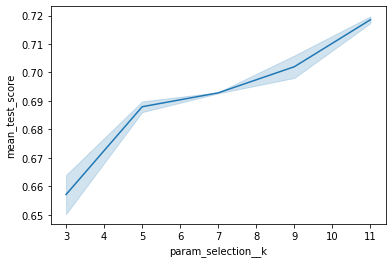

In [23]:
sns.lineplot(data=res, x='param_selection__k', y='mean_test_score')

In [24]:
model = LinearRegression()

In [25]:
selector = RFE(model, n_features_to_select=5, step=1)

In [26]:
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [27]:
X_selected = selector.transform(X_train)

In [30]:
X_train.shape, X_selected.shape

((379, 13), (379, 5))

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.coef_

array([-1.00073589e-01,  4.42624983e-02,  5.84394133e-03,  2.66527238e+00,
       -1.63577601e+01,  4.48131793e+00, -1.44922085e-02, -1.45243354e+00,
        2.84849406e-01, -1.36313460e-02, -9.79820415e-01,  1.01913214e-02,
       -3.91036917e-01])

In [37]:
selector.ranking_

array([3, 5, 9, 1, 1, 1, 7, 1, 4, 6, 1, 8, 2])

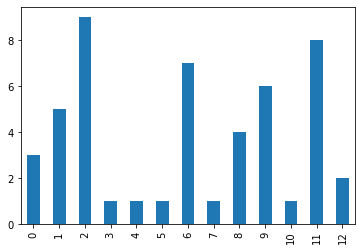

In [39]:
rank = pd.Series(selector.ranking_)
rank.plot.bar()